In [2]:
# Environment setup and imports
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure notebook environment for clean logging
os.environ['KEPLER_NOTEBOOK_MODE'] = 'true'

# Import Kepler framework
sys.path.append('..')
import kepler as kp

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print(f"Kepler Framework version: {kp.__version__}")
print("Environment configured successfully")


Kepler Framework version: 0.1.0
Environment configured successfully


In [3]:
# Extract comprehensive sensor data
sensor_data = kp.data.from_splunk(
    spl="search index=kepler_lab earliest=-30d | table _time, sensor_id, sensor_type, value, unit, area, alert_level, facility | head 300"
)

print(f"Data extracted: {len(sensor_data)} records")
if len(sensor_data) > 0:
    print(f"Columns: {list(sensor_data.columns)}")
    print("Sample data:")
    print(sensor_data.head())


✅ Extracted 300 records from Splunk
Data extracted: 300 records
Columns: ['_time', 'sensor_id', 'sensor_type', 'value', 'unit', 'area', 'alert_level', 'facility']
Sample data:
                           _time   sensor_id  sensor_type               value  \
0  2025-08-01T17:16:18.000-05:00  SENSOR_005  temperature   60.48388005562071   
1  2025-08-01T17:16:18.000-05:00  SENSOR_002    vibration                null   
2  2025-08-01T17:16:18.000-05:00  SENSOR_003    flow_rate   318.4876000271967   
3  2025-08-01T17:16:18.000-05:00  SENSOR_001  temperature   62.30528168206019   
4  2025-08-01T17:16:18.000-05:00  SENSOR_006     pressure  10.523449607880593   

    unit        area alert_level     facility  
0     °C  production      normal  Plant_Alpha  
1   mm/s   utilities      normal  Plant_Alpha  
2  L/min  production      normal  Plant_Alpha  
3     °C  production      normal  Plant_Alpha  
4    bar  production      normal  Plant_Alpha  


In [4]:
# Data preprocessing and quality assessment
sensor_data['value_numeric'] = pd.to_numeric(sensor_data['value'], errors='coerce')
sensor_data['timestamp'] = pd.to_datetime(sensor_data['_time'])

# Remove invalid data
clean_data = sensor_data.dropna(subset=['value_numeric'])

print(f"Data after preprocessing: {len(clean_data)} records")
print(f"Records removed: {len(sensor_data) - len(clean_data)}")

# Basic statistics
print("\nBasic statistics:")
print(clean_data['value_numeric'].describe())

# Data distribution by sensor type
print("\nSensor type distribution:")
sensor_counts = clean_data['sensor_type'].value_counts()
for sensor_type, count in sensor_counts.items():
    percentage = (count / len(clean_data)) * 100
    print(f"  {sensor_type}: {count} readings ({percentage:.1f}%)")


Data after preprocessing: 298 records
Records removed: 2

Basic statistics:
count     298.000000
mean      328.105975
std       400.690437
min         2.634517
25%         9.505575
50%        60.464040
75%       878.066387
max      1014.158391
Name: value_numeric, dtype: float64

Sensor type distribution:
  power_consumption: 90 readings (30.2%)
  temperature: 89 readings (29.9%)
  vibration: 59 readings (19.8%)
  flow_rate: 30 readings (10.1%)
  pressure: 30 readings (10.1%)


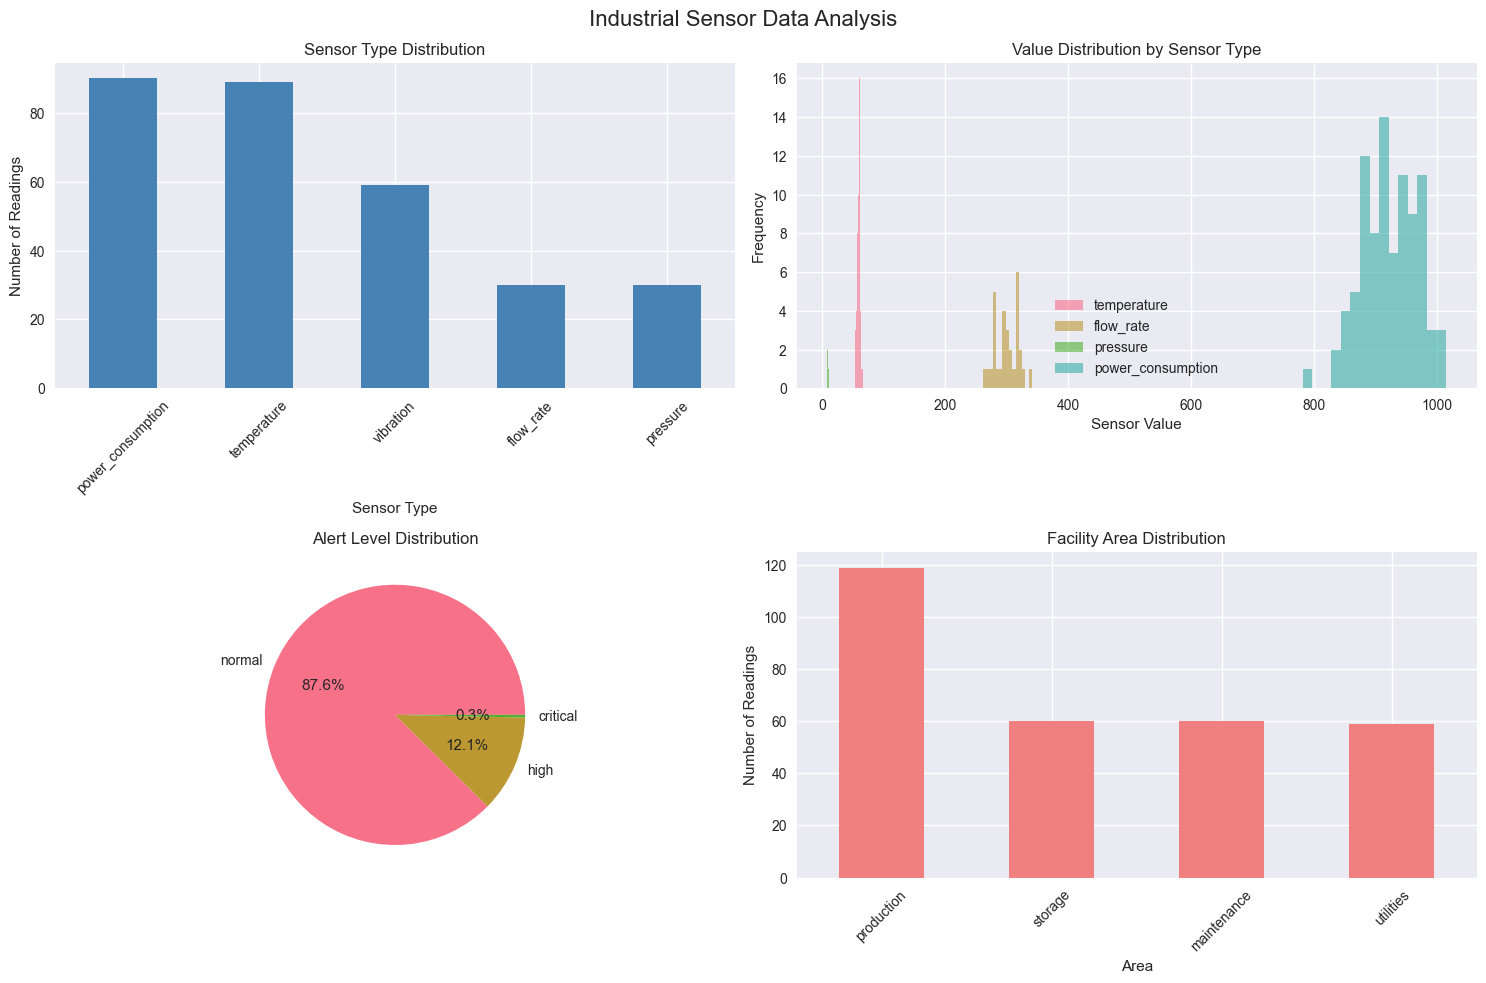

In [5]:
# Visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Industrial Sensor Data Analysis', fontsize=16)

# 1. Sensor type distribution
sensor_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Sensor Type Distribution')
axes[0, 0].set_xlabel('Sensor Type')
axes[0, 0].set_ylabel('Number of Readings')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Value distribution by sensor type
for i, sensor_type in enumerate(clean_data['sensor_type'].unique()[:4]):
    data_subset = clean_data[clean_data['sensor_type'] == sensor_type]['value_numeric']
    axes[0, 1].hist(data_subset, alpha=0.6, label=sensor_type, bins=15)
axes[0, 1].set_title('Value Distribution by Sensor Type')
axes[0, 1].set_xlabel('Sensor Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# 3. Alert level distribution
if 'alert_level' in clean_data.columns:
    alert_counts = clean_data['alert_level'].value_counts()
    alert_counts.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%')
    axes[1, 0].set_title('Alert Level Distribution')
    axes[1, 0].set_ylabel('')

# 4. Area distribution
if 'area' in clean_data.columns:
    area_counts = clean_data['area'].value_counts()
    area_counts.plot(kind='bar', ax=axes[1, 1], color='lightcoral')
    axes[1, 1].set_title('Facility Area Distribution')
    axes[1, 1].set_xlabel('Area')
    axes[1, 1].set_ylabel('Number of Readings')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# Extract comprehensive sensor data
sensor_data = kp.data.from_splunk(
    spl="""search index=kepler_lab earliest=-30d 
    | table _time, sensor_id, sensor_type, value, unit, area, alert_level, facility, hour, day_of_week, shift
    | sort -_time
    | head 500"""
)

print(f"Data extracted: {len(sensor_data)} records")
if len(sensor_data) > 0:
    print(f"Time range: {sensor_data['_time'].min()} to {sensor_data['_time'].max()}")
    print(f"Columns: {list(sensor_data.columns)}")
else:
    print("No data found in the specified time range")


✅ Extracted 500 records from Splunk
Data extracted: 500 records
Time range: 2025-08-02T06:26:18.000-05:00 to 2025-08-02T10:31:18.000-05:00
Columns: ['_time', 'sensor_id', 'sensor_type', 'value', 'unit', 'area', 'alert_level', 'facility', 'hour', 'day_of_week', 'shift']
